# **SIN JCOMP - Analysis of Amazon products and Google Pages network**

**Import the required libraries**

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

**Read the network graphs**

In [2]:
amzNet = nx.read_adjlist("amazon-py.txt")
gNet = nx.read_adjlist("google-py.txt")

**Get the edges**

In [3]:
A_edges = list(nx.edges(amzNet))
G_edges = list(nx.edges(gNet))

In [4]:
A_nodes = list(nx.nodes(amzNet))
G_nodes = list(nx.nodes(gNet))

# **Shortest Path Calculation - Dijkstra**

In [5]:
def find_distance(node,network):
  for i in range(len(network)):
    if network[i][1]==node:
      return network[i][0]

In [6]:
def change_distance(node,network,value):
  z = []

  for i in range(len(network)):
    if network[i][1]==node:
      z = list(network[i])
      z[0] = value
      network.remove(network[i])
      network.append(tuple(z))
      break
    
  return network

In [7]:
def shortest_path_dijkstra(node,nodes,edges,dir,pt):
  network_nodes = []
  temp = []

  for x in nodes:
    temp = []

    if int(x)==node:
      temp.append(0)
      temp.append(x)

      network_nodes.append(tuple(temp))

    else:
      temp.append(10000)
      temp.append(x)

      network_nodes.append(tuple(temp))  

  network_nodes.sort()

  visited = []

  while(True):
    network_nodes.sort()
    p = ""
    flag=0

    for i in range(len(network_nodes)):
      if network_nodes[i][1] in visited:
        continue
      else:
        flag=1
        p=network_nodes[i][1]
        break
    
    if flag==0:
      break

    visited.append(p)

    for i in range(len(edges)):
      if edges[i][0]==p:
        d1 = find_distance(p,network_nodes)
        d2 = find_distance(edges[i][1],network_nodes)

        if d2==None:
          continue

        if d1+1 < d2:
          d2 = d1+1
          network_nodes = change_distance(edges[i][1],network_nodes,d2)

        if dir==0:   
          if edges[i][1]==p:
            d1 = find_distance(p,network_nodes)
            d2 = find_distance(edges[i][0],network_nodes)

            if d2==None:
              continue

            if d1+1 < d2:
              d2 = d1+1
              network_nodes = change_distance(edges[i][0],network_nodes,d2)
    
  network_nodes.sort()
  
  if pt==0:
    print("Node   :  Distance")
    print("")

  maximum=0
  
  for x in network_nodes:
    if x[0]==10000:
      continue
    else:
      if pt==0:
        print(x[1]+"  :  "+str(x[0]))

      if x[0]>maximum:
        maximum = x[0]
  
  return maximum

In [9]:
maximum = shortest_path_dijkstra(2,A_nodes[0:1000],A_edges[0:10000],1,1)
print("maximum : "+str(maximum))

maximum : 8


# **Shortest Path Calculation - Bellman Ford**

In [11]:
def shortest_path_bellman(node,nodes,edges,pt):
  network_nodes = []
  temp = []

  for x in nodes:
    temp = []

    if int(x)==node:
      temp.append(0)
      temp.append(x)

      network_nodes.append(tuple(temp))

    else:
      temp.append(10000)
      temp.append(x)

      network_nodes.append(tuple(temp))  

  for j in range(len(nodes)-1):
    for i in range(len(edges)):

        d1 = find_distance(edges[i][0],network_nodes)
        d2 = find_distance(edges[i][1],network_nodes)

        if d2==None or d1==None:
          continue

        elif d1+1 < d2:
          d2 = d1+1

          network_nodes = change_distance(edges[i][1],network_nodes,d2)
    
  network_nodes.sort()

  if pt==0:
    print("Node   :  Distance")
    print("")

  maximum=0
  
  for x in network_nodes:
    if x[0]==10000:
      continue
    else:
      if pt==0:
        print(x[1]+"  :  "+str(x[0]))

      if x[0]>maximum:
        maximum = x[0]
  
  return maximum

In [12]:
maximum = shortest_path_bellman(2,A_nodes[0:100],A_edges[0:1000],1)
print("maximum : "+str(maximum))

maximum : 3


#**Shortest Path - Breadth First Search**

In [13]:
def BFS(node,edges):
  visited = []
  adj = []

  adj.append(str(node))

  dist = {str(node):0}

  while(len(adj)!=0):
    p = adj[0]

    for edge in edges:
      if edge[0]==p and (edge[1] not in visited):
        dist[edge[1]] = dist[p]+1
        adj.append(edge[1])

    visited.append(p)
    adj = adj[1:]

  print(dist)

In [14]:
BFS(2,A_edges[0:1000])

{'2': 0, '11': 1, '12': 1, '13': 1, '14': 2, '6': 2, '9': 3, '20': 3, '25': 2, '26': 2, '45': 2, '46': 2, '47': 2, '57': 2, '58': 2, '59': 2, '88': 2, '265': 2, '266': 2, '267': 2, '402': 2, '500': 2, '501': 2, '545': 2, '546': 2, '1682': 2, '1683': 2, '1698': 2, '1699': 2, '3452': 2, '4751': 2, '5536': 2, '6543': 3, '6772': 2, '7989': 3, '9764': 2, '11537': 2, '14027': 2, '14028': 2, '14029': 2, '17558': 2, '17560': 2, '25438': 2, '29093': 2, '30527': 2, '30528': 2, '30638': 2, '31484': 2, '32249': 3, '37003': 2, '37282': 2, '37283': 2, '47561': 2, '61639': 2, '64263': 2, '135675': 2, '135677': 2, '160515': 2, '161211': 2, '235643': 2, '260': 2, '261': 2, '262': 2, '263': 2, '264': 2, '666': 2, '1669': 2, '4369': 3, '6574': 2, '6813': 2, '9503': 2, '10613': 3, '12672': 2, '12804': 2, '13949': 2, '16715': 2, '16833': 2, '32729': 2, '42857': 2, '43676': 2, '47616': 2, '51692': 2, '58028': 2, '62066': 2, '72137': 2, '86723': 2, '8': 3, '21': 4, '23': 4, '140': 2, '141': 2, '27': 3, '79':

#**Obtaining the diameter, radius and average path length**

In [15]:
def path_length(algo,nodes,edges):
  l = []

  if algo==1:
    for i in nodes:
      maximum = shortest_path_dijkstra(int(i),nodes,edges,1,1)
      
      if maximum!=0:
        l.append(maximum)

  else:
    for i in nodes:
      maximum = shortest_path_bellman(int(i),nodes,edges,1)
      
      if maximum!=0:
        l.append(maximum)

  print("Diameter : "+str(max(l)))
  print("Radius : "+str(min(l)))
  print("Average Eccentricity : "+str(sum(l)/len(l)))

In [16]:
#using Dijkstra
path_length(1,G_nodes[0:100],G_edges[0:1000])

Diameter : 3
Radius : 1
Average Eccentricity : 1.8888888888888888


In [17]:
#using Bellmanford
path_length(1,G_nodes[0:100],G_edges[0:1000])

Diameter : 3
Radius : 1
Average Eccentricity : 1.8888888888888888


#**Clustering - KMeans approach using shortest path**

In [18]:
def Kmeans(k,edges):
  net = nx.Graph(edges)
  nodes = list(nx.nodes(net)) 

  c = []
  i=0

  while(True):  
    p = random.randrange(0,len(nodes)-1)

    if p not in c:
      c.append(p)
      i+=1

    if i==k:
      break
  
  for i in range(k):
    c[i] = nodes[c[i]]

  while(True):

    dist = {}

    for j in c:
      dist[j] = []

    for i in nodes:
      d = []

      for j in c:
        d.append(nx.shortest_path_length(net,i,j))

      temp = min(d)
        
      for q in range(len(d)):
        if temp==d[q]:
          dist[c[q]].append(i)
          break 
    
    for x in dist:
      dist[x] = list(set(dist[x]))

    print(c)
    print(dist)

    new_c = []

    for x in dist:
      maximum = 0
      p = 0

      for i in dist[x]:
        closeness = nx.closeness_centrality(net,i)

        if closeness > maximum:
          maximum = closeness
          p=i

      new_c.append(p)
    
    print(new_c)
    
    if c==new_c:
      break
    else:
      c=new_c

  print("")
  print("Final Centroids")
  print(c)
  print("")
  print("Final Cluster")
  print(dist)
  print("")

  colors = ["blue","red","green","yellow","black","pink","orange"]

  color_map = []
  t = []

  for x in dist:
    t.append(dist[x])

  for node in nodes:
    for i in range(len(t)):
      if node in t[i]:
        color_map.append(colors[i])
        break
  
  nx.draw(net)
  nx.draw(net,node_color=color_map)

['4034', '9', '11', '3', '64', '1723', '74']
{'4034': ['630', '17', '241000', '282', '180', '9762', '629', '16', '10045', '11928', '431', '1', '4658', '12035', '7', '18', '4', '5830', '19', '3801', '15', '109', '75', '73', '110', '4034', '1722'], '9': ['5', '9', '139', '10', '6', '8'], '11': ['11', '12', '14', '2', '13'], '3': ['67', '66', '3', '0', '65', '63'], '64': ['64'], '1723': ['1723'], '74': ['74']}
['4', '5', '2', '0', '64', '1723', '74']
['4', '5', '2', '0', '64', '1723', '74']
{'4': ['630', '17', '241000', '282', '180', '9762', '629', '16', '10045', '11928', '431', '1', '4658', '12035', '7', '18', '4', '5830', '19', '3801', '15', '109', '75', '73', '110', '4034', '1722'], '5': ['5', '9', '139', '10', '6', '8'], '2': ['11', '12', '14', '2', '13'], '0': ['67', '66', '3', '0', '65', '63'], '64': ['64'], '1723': ['1723'], '74': ['74']}
['4', '5', '2', '0', '64', '1723', '74']

Final Centroids
['4', '5', '2', '0', '64', '1723', '74']

Final Cluster
{'4': ['630', '17', '241000', '

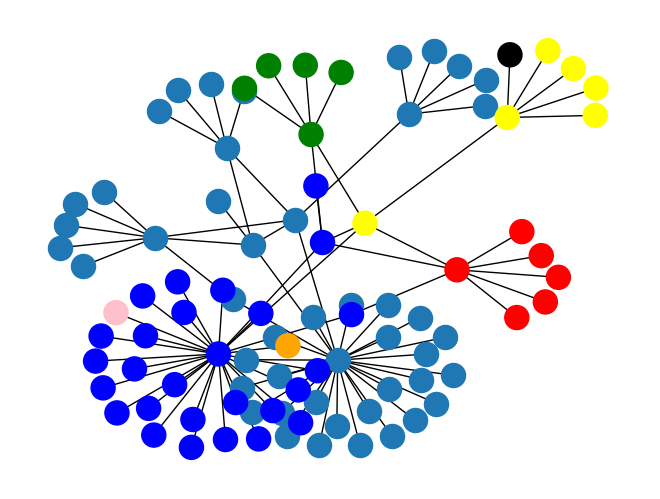

In [19]:
Kmeans(7,A_edges[0:50])

#**Community Detection**

In [20]:
net = nx.Graph(G_edges[0:1000])
communities = nx.community.girvan_newman(net)

for community in next(communities):
    print(community)

{'215810', '612032', '229705', '284059', '877381', '701455', '560047', '655101', '640341', '728417', '867923', '367595', '500542', '714886', '854209', '414038', '817484', '400909', '430471', '798461', '15901', '684435', '593894', '426863', '769029', '480435', '859941', '740065', '628457', '149447', '385830', '177218', '115267', '828241', '692491', '152996', '479137', '281963', '366080', '635343', '56910', '856657', '821092', '676560', '699910', '803972', '297780', '71878', '538214', '171857', '223330', '243975', '479014', '421310', '79631', '483644', '395856', '804858', '815925', '844885', '255023', '358935', '500627', '120076', '795148', '720723', '835220', '677789', '523684', '430049', '416555', '695578', '768204', '600249', '387543', '73631', '754862', '464225', '483838', '543606', '294155', '609210', '522510', '688056', '254529', '358505', '309564', '468354', '571331', '365423', '48192', '160114', '203547', '830675', '320258', '556817', '645018', '848683', '558815', '331282', '7259

#**Link Prediction**

In [21]:
net = nx.Graph(G_edges[0:100])
link_prediction = nx.link_prediction.jaccard_coefficient(net)

for u, v, p in link_prediction:
    print(f"({u}, {v}): {p}")

(215810, 31300): 1.0
(215810, 553829): 1.0
(215810, 30281): 1.0
(215810, 91807): 1.0
(215810, 82205): 1.0
(215810, 684417): 1.0
(215810, 877381): 1.0
(215810, 701455): 1.0
(215810, 765654): 1.0
(215810, 403327): 1.0
(215810, 428822): 1.0
(215810, 89773): 1.0
(215810, 728417): 1.0
(215810, 867923): 1.0
(215810, 854209): 1.0
(215810, 414038): 1.0
(215810, 72432): 1.0
(215810, 15901): 1.0
(215810, 600594): 1.0
(215810, 50822): 1.0
(215810, 628457): 1.0
(215810, 535748): 1.0
(215810, 828241): 1.0
(215810, 692491): 1.0
(215810, 644912): 1.0
(215810, 366080): 1.0
(215810, 635343): 1.0
(215810, 56910): 1.0
(215810, 856657): 1.0
(215810, 821092): 1.0
(215810, 293748): 1.0
(215810, 180285): 1.0
(215810, 136131): 1.0
(215810, 71878): 1.0
(215810, 68314): 1.0
(215810, 108113): 1.0
(215810, 512812): 1.0
(215810, 857527): 1.0
(215810, 483644): 1.0
(215810, 395856): 1.0
(215810, 322178): 1.0
(215810, 500627): 1.0
(215810, 102341): 1.0
(215810, 867959): 1.0
(215810, 795148): 1.0
(215810, 523684): 1.0